### Time Series Decomposition

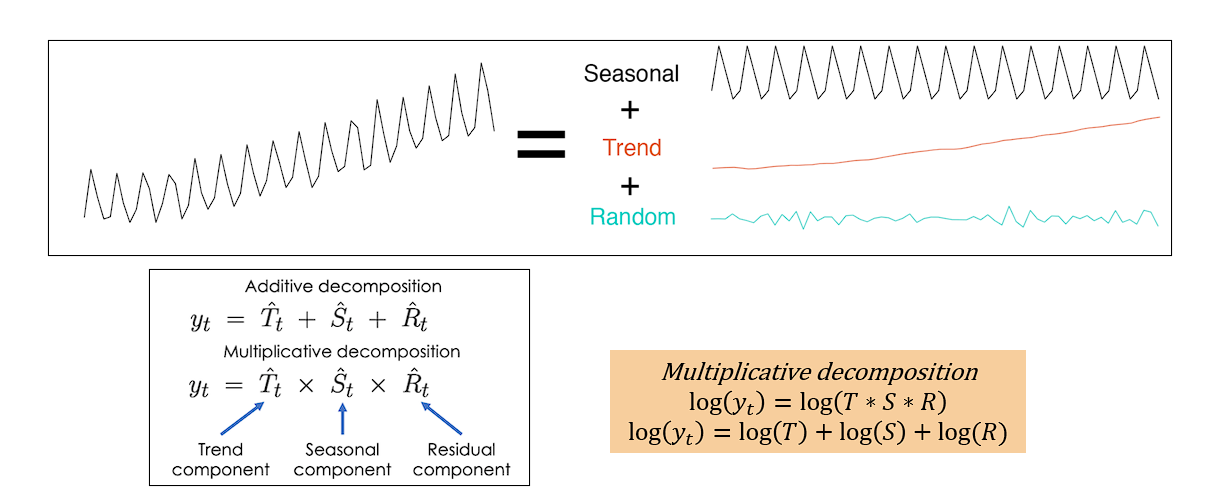

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the dataset

In [2]:
import pandas as pd 
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
df.isna().sum()

#Passengers    0
dtype: int64

In [5]:
df.columns = ['nPass']

In [6]:
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visualise the time series data

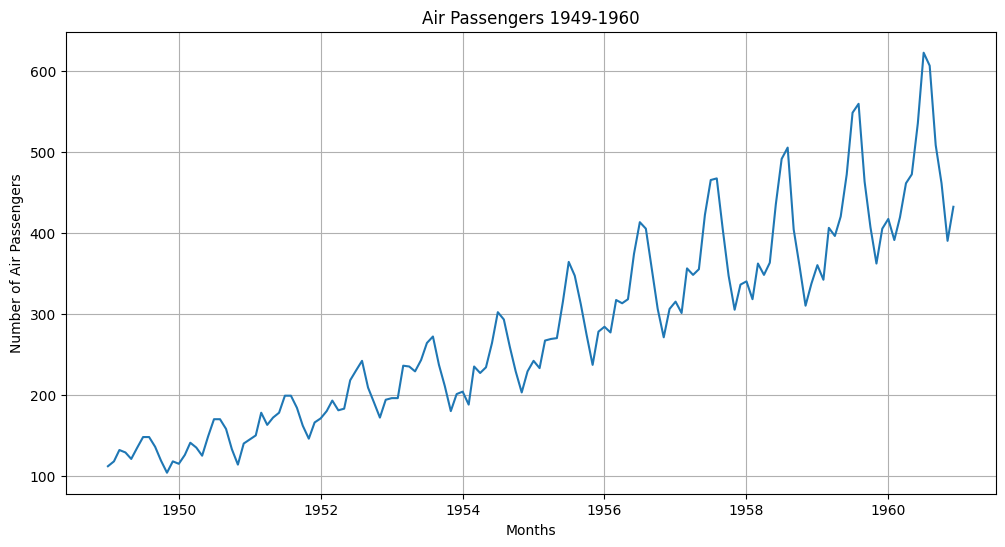

In [7]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(df['nPass'])
plt.xlabel('Months')
plt.ylabel('Number of Air Passengers')
plt.title('Air Passengers 1949-1960')
plt.grid()
plt.show()

### Time Series Decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
Q = seasonal_decompose(df['nPass'], model='multiplicative')

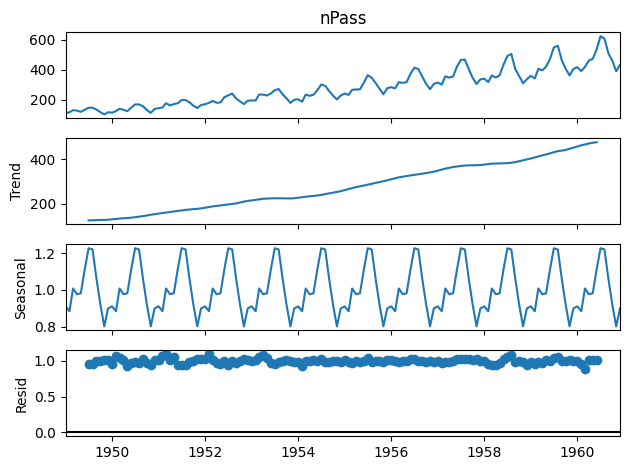

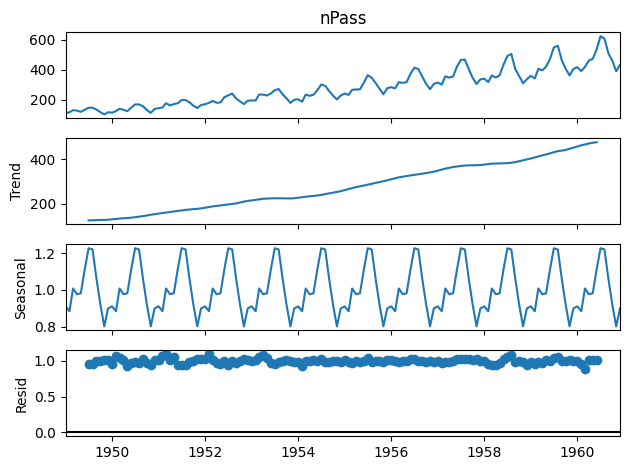

In [10]:
Q.plot()

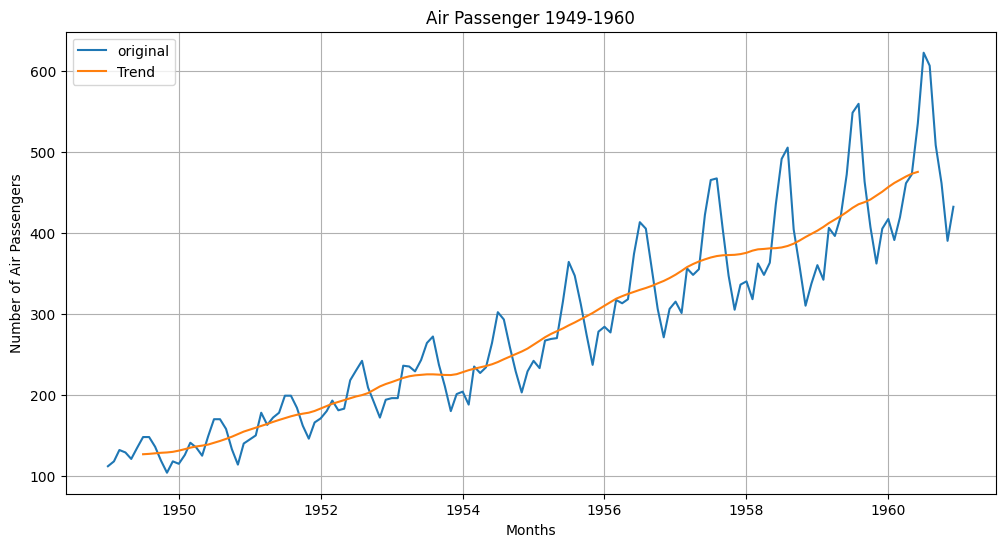

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['nPass'], label='original')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('Number of Air Passengers')
plt.title('Air Passenger 1949-1960')
plt.grid()
plt.legend()
plt.show()

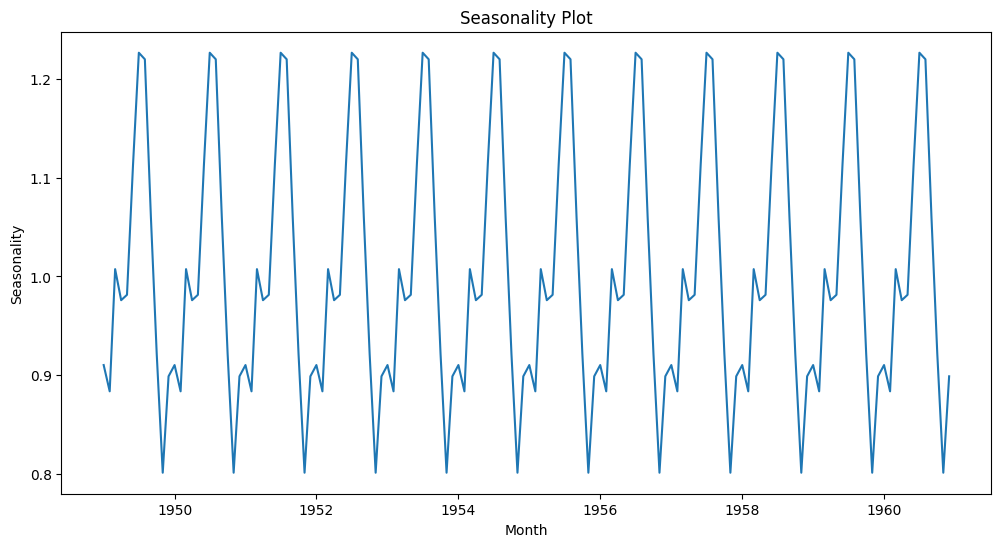

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(Q.seasonal)
plt.xlabel('Month')
plt.ylabel('Seasonality')
plt.title('Seasonality Plot')
plt.show()

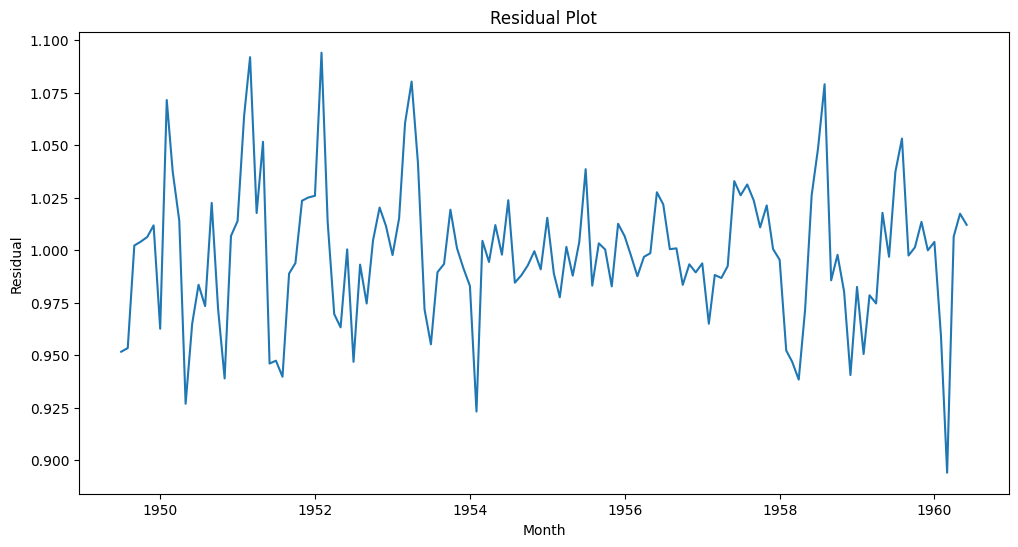

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(Q.resid)
plt.xlabel('Month')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

Multiplicative model yt = Trend X Season X Residual

### Time series Forecasting


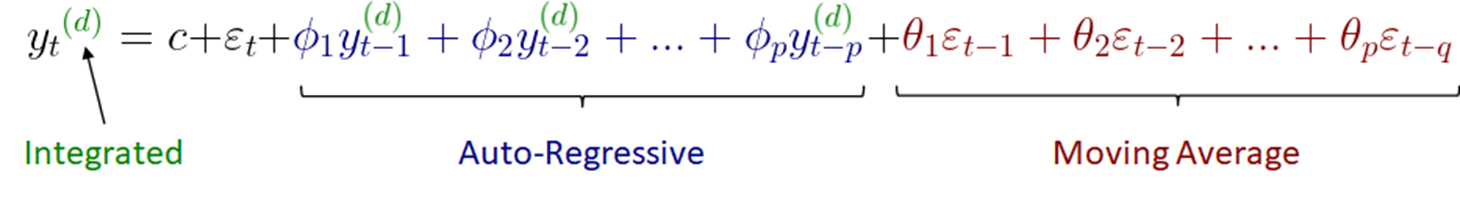

ARIMA : Auto Regression Integrated Moving Average

Install tne PMDARIMA model

In [14]:
%pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   ------- -------------------------------- 112.6/614.7 kB 2.2 MB/s eta 0:00:01
   ----------------------- ---------------- 358.4/614.7 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.8 MB 5.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.5/2.8 MB 5.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.8 MB 6.2 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 5.7 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 5.6 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.8 MB 5.8 MB/s eta 0:00:01
   ---------

Restart and run all the cells

In [15]:
from pmdarima.arima import auto_arima

In [16]:
model = auto_arima(df['nPass'], seasonal=True, m=12)

In [17]:
model.order

(2, 1, 1)

In [18]:
p = model.order[0]
d = model.order[1]
q = model.order[2]

In [19]:
p

2

In [20]:
d

1

In [21]:
q

1

Get the forcasted value for next 3 years

3 years = 36 months

In [22]:
forecast, conf = model.predict(n_periods=36, return_conf_int=True)

In [23]:
forecast

1961-01-01    445.634907
1961-02-01    420.394942
1961-03-01    449.198225
1961-04-01    491.839807
1961-05-01    503.394291
1961-06-01    566.862218
1961-07-01    654.259899
1961-08-01    638.597167
1961-09-01    540.883380
1961-10-01    494.126221
1961-11-01    423.332274
1961-12-01    465.507108
1962-01-01    479.290363
1962-02-01    454.176270
1962-03-01    483.086356
1962-04-01    525.818559
1962-05-01    537.449936
1962-06-01    600.983107
1962-07-01    688.436146
1962-08-01    672.820386
1962-09-01    575.146455
1962-10-01    528.423113
1962-11-01    457.657860
1962-12-01    499.857041
1963-01-01    513.660954
1963-02-01    488.564390
1963-03-01    517.489348
1963-04-01    560.234172
1963-05-01    571.876256
1963-06-01    635.418512
1963-07-01    722.879260
1963-08-01    707.270042
1963-09-01    609.601660
1963-10-01    562.883028
1963-11-01    492.121771
1963-12-01    534.324343
Freq: MS, dtype: float64

In [24]:
conf

array([[423.34488264, 467.92493165],
       [394.23564894, 446.55423507],
       [419.83210771, 478.56434165],
       [460.37679811, 523.30281527],
       [470.38111403, 536.40746738],
       [532.70008828, 601.02434825],
       [619.22199213, 689.29780492],
       [602.88077613, 674.31355781],
       [504.63222253, 577.13453725],
       [457.44691601, 530.80552559],
       [386.30486083, 460.35968637],
       [428.19237042, 502.82184652],
       [433.49861559, 525.08211028],
       [405.11019165, 503.24234886],
       [431.15712965, 535.01558147],
       [471.84221792, 579.79490098],
       [481.8754046 , 593.02446742],
       [544.15855734, 657.80765626],
       [630.61085546, 746.26143624],
       [614.18136964, 731.45940267],
       [515.83469612, 634.45821315],
       [468.54648192, 588.29974394],
       [397.29971635, 518.01600314],
       [439.08245577, 560.63162711],
       [446.32983564, 580.99207268],
       [418.32114752, 558.80763244],
       [444.62739371, 590.35130268],
 

Add above results in dataframe

In [25]:
df_forecast = forecast.to_frame()
df_forecast.columns = ['forecast']
df_forecast

,forecast
1961-01-01,445.634907
1961-02-01,420.394942
1961-03-01,449.198225
1961-04-01,491.839807
1961-05-01,503.394291
1961-06-01,566.862218
1961-07-01,654.259899
1961-08-01,638.597167
1961-09-01,540.883380
1961-10-01,494.126221


In [26]:
df_forecast[['Low_conf', 'Upper_conf']] = conf

In [27]:
df_forecast

,forecast,Low_conf,Upper_conf
1961-01-01,445.634907,423.344883,467.924932
1961-02-01,420.394942,394.235649,446.554235
1961-03-01,449.198225,419.832108,478.564342
1961-04-01,491.839807,460.376798,523.302815
1961-05-01,503.394291,470.381114,536.407467
1961-06-01,566.862218,532.700088,601.024348
1961-07-01,654.259899,619.221992,689.297805
1961-08-01,638.597167,602.880776,674.313558
1961-09-01,540.883380,504.632223,577.134537
1961-10-01,494.126221,457.446916,530.805526


In [28]:
df_forecast['forecast'] = df_forecast['forecast'].apply(round)

In [29]:
df_forecast.head()

,forecast,Low_conf,Upper_conf
1961-01-01,446,423.344883,467.924932
1961-02-01,420,394.235649,446.554235
1961-03-01,449,419.832108,478.564342
1961-04-01,492,460.376798,523.302815
1961-05-01,503,470.381114,536.407467


In [30]:
for i in df_forecast.columns:
    df_forecast[i] = df_forecast[i].apply(round)

In [31]:
df_forecast

,forecast,Low_conf,Upper_conf
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


Save above dataframe to csv

In [32]:
df_forecast.to_csv('AirPassengerForecast.csv')

Visualizing above results

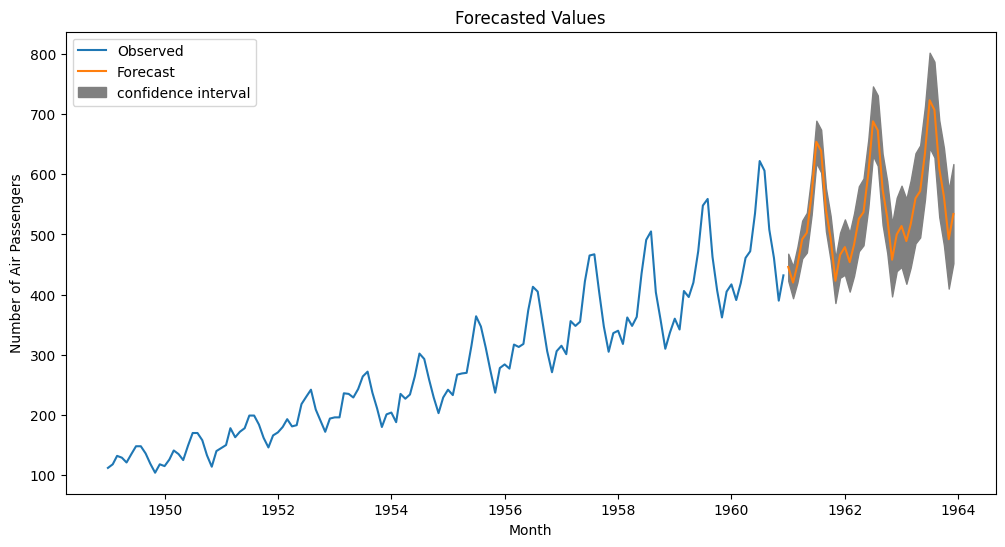

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df['nPass'], label='Observed')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.fill_between(df_forecast.index, df_forecast['Low_conf'], df_forecast['Upper_conf'], color='gray', label='confidence interval')
plt.xlabel('Month')
plt.ylabel('Number of Air Passengers')
plt.title('Forecasted Values')
plt.legend()
plt.show()